# POS-PCA

- create sentences for the three tasks
- Analyse the part-of-speech for each sentences across three tasks
- after some trials, the best plot should be overall word percentage (the first one)

## proportional data

### use word percentage
- count the percentage of POS for each sentence
- numbers of nouns/ total numbers of words within one sentence)

In [1]:
import spacy
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

In [2]:
# set constant
task_colors = {'BlocksA_CV': '#9796f0', 'BlocksA_DG': '#ee9ca7',  #purple; pink
               'BlocksB_CV': '#6dd5ed', 'BlocksB_DG': '#b92b27',  #blue; red
              'Blicket_CV': '#ACBB78', 'Blicket_DG':'#ffa751'}  #light green; orange

In [3]:
# Load the CSV files into the script
df = pd.read_csv(r'D:\UoA/04research\01PhD_projects\03_POS\data_analysis\POS_dataframe_calculation_2.csv')

In [4]:
df.head(5)

,StudyID,condition,task,Task_name,interactoin_order,text_cleaned,duration,nouns_replace,verbs_replace,adjectives_replace,...,adjectives_corrected_count,pronouns_corrected_count,nouns_prop_word,verbs_prop_word,adjs_prop_word,pronouns_prop_word,nouns_prop_second,verbs_prop_second,adjs_prop_second,pronouns_prop_second
0,DIME001,CV,Blicket,Blicket_CV,2,right .,0.593037,NaN,NaN,NaN,...,0,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,DIME001,CV,Blicket,Blicket_CV,2,"[ childname ] , do you know what this is ?",1.761141,NaN,know,NaN,...,0,2,0.0,14.285714,0.0,28.571429,0.0,0.567814,0.0,1.135627
2,DIME001,CV,Blicket,Blicket_CV,2,[ childname ] ?,0.557096,NaN,NaN,NaN,...,0,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,DIME001,CV,Blicket,Blicket_CV,2,"[ childname ] , do you know what this is ?",2.587799,NaN,know,NaN,...,0,2,0.0,14.285714,0.0,28.571429,0.0,0.386429,0.0,0.772857
4,DIME001,CV,Blicket,Blicket_CV,2,"look , look here .",1.024337,NaN,look look,NaN,...,0,0,0.0,66.666667,0.0,0.000000,0.0,1.952482,0.0,0.000000


In [5]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(df[["nouns_prop_word", "verbs_prop_word","adjs_prop_word", "pronouns_prop_word"]].values)

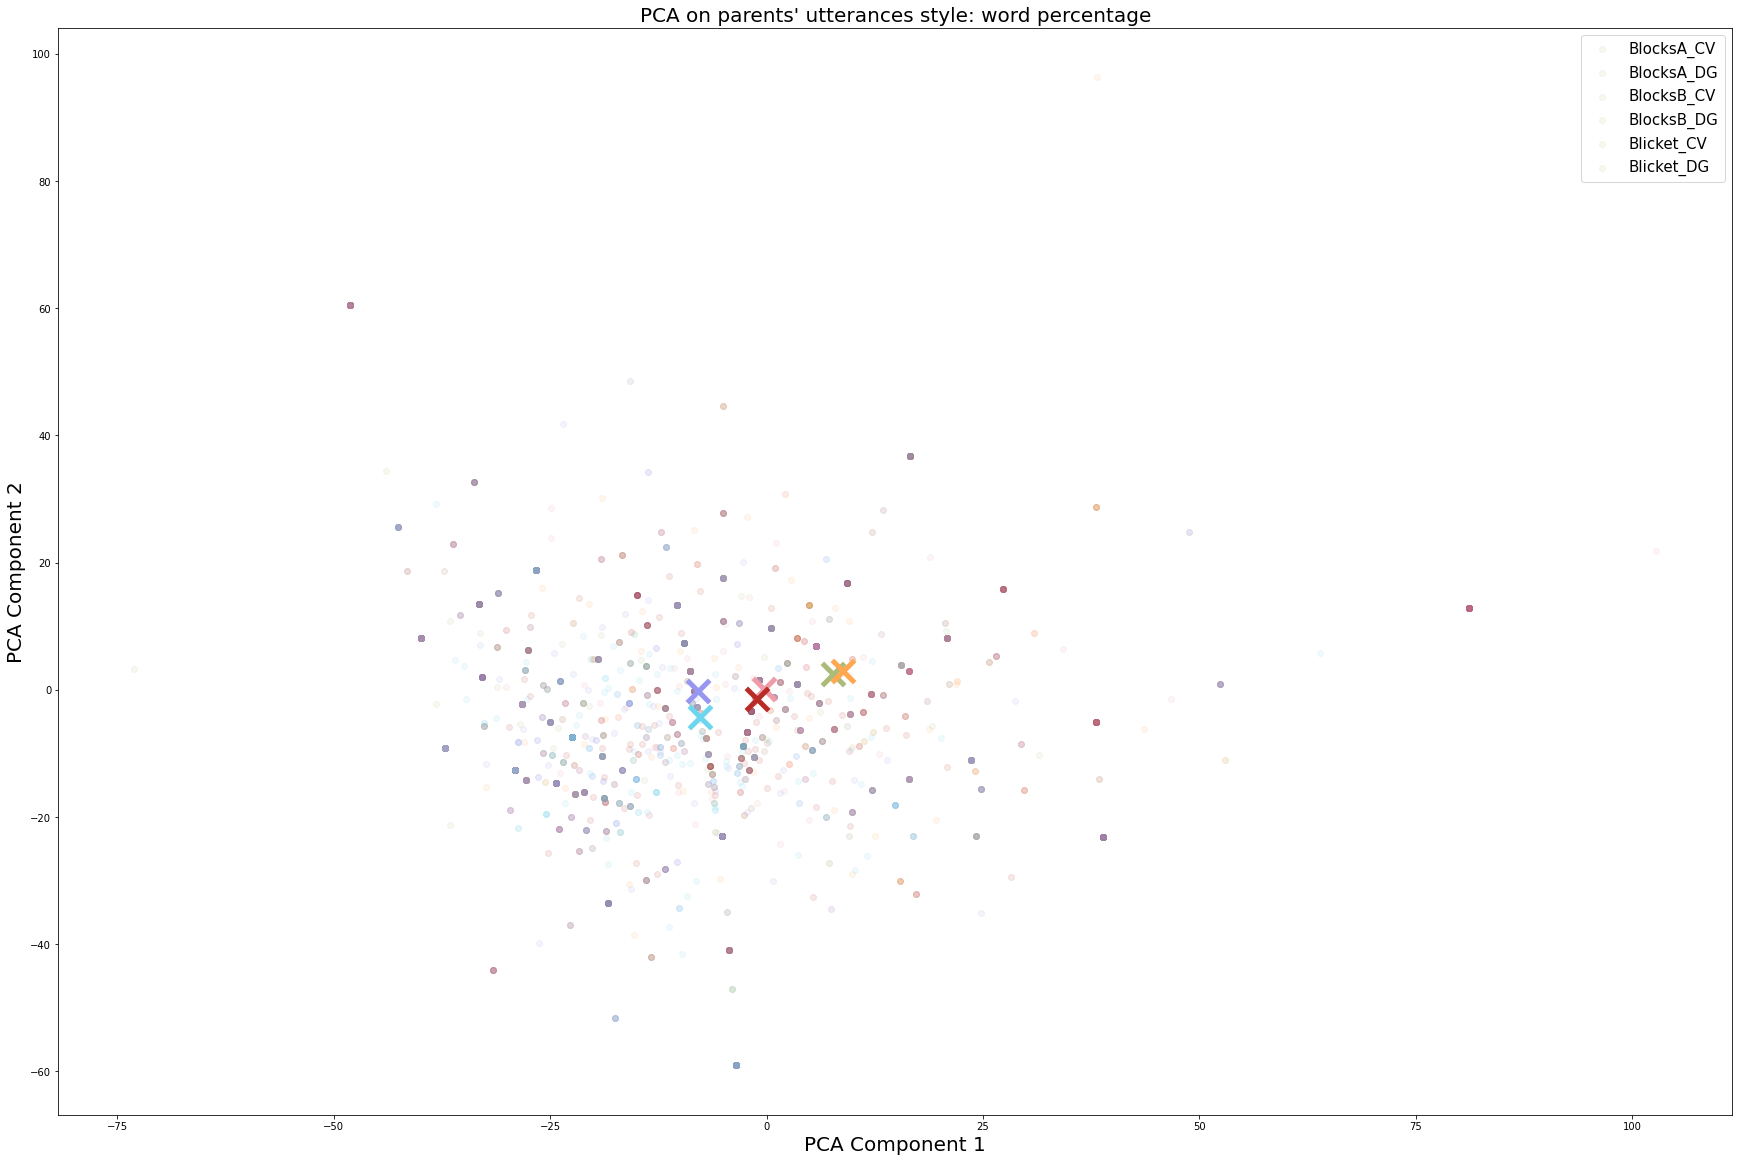

In [6]:
# plot the scatterplot
fig, ax = plt.subplots(figsize=(30, 20))

for i, vec in enumerate(reduced_vectors):
    x, y = vec[0], vec[1]
    task_type = df.iloc[i]["Task_name"]
    color = task_colors[task_type]
    ax.scatter(x, y, color=color, alpha=0.1)

# calculate and plot task centers
df_by_task = df.groupby("Task_name")
centers = {}
for task, task_df in df_by_task:
    task_vectors = reduced_vectors[task_df.index]
    center = np.mean(task_vectors, axis=0)
    centers[task] = center
    ax.scatter(*center, color=task_colors[task], marker='x', s=500, linewidth=5)

# add legend and axis labels
ax.legend(task_colors.keys(), loc='upper right', fontsize=15)
ax.set_xlabel("PCA Component 1", fontsize=20)
ax.set_ylabel("PCA Component 2", fontsize=20)
plt.title("PCA on parents' utterances style: word percentage", fontsize=20)
# Set x-tick and y-tick font size
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()


In [9]:
plt.savefig("PCA-1.png")

<Figure size 432x288 with 0 Axes>

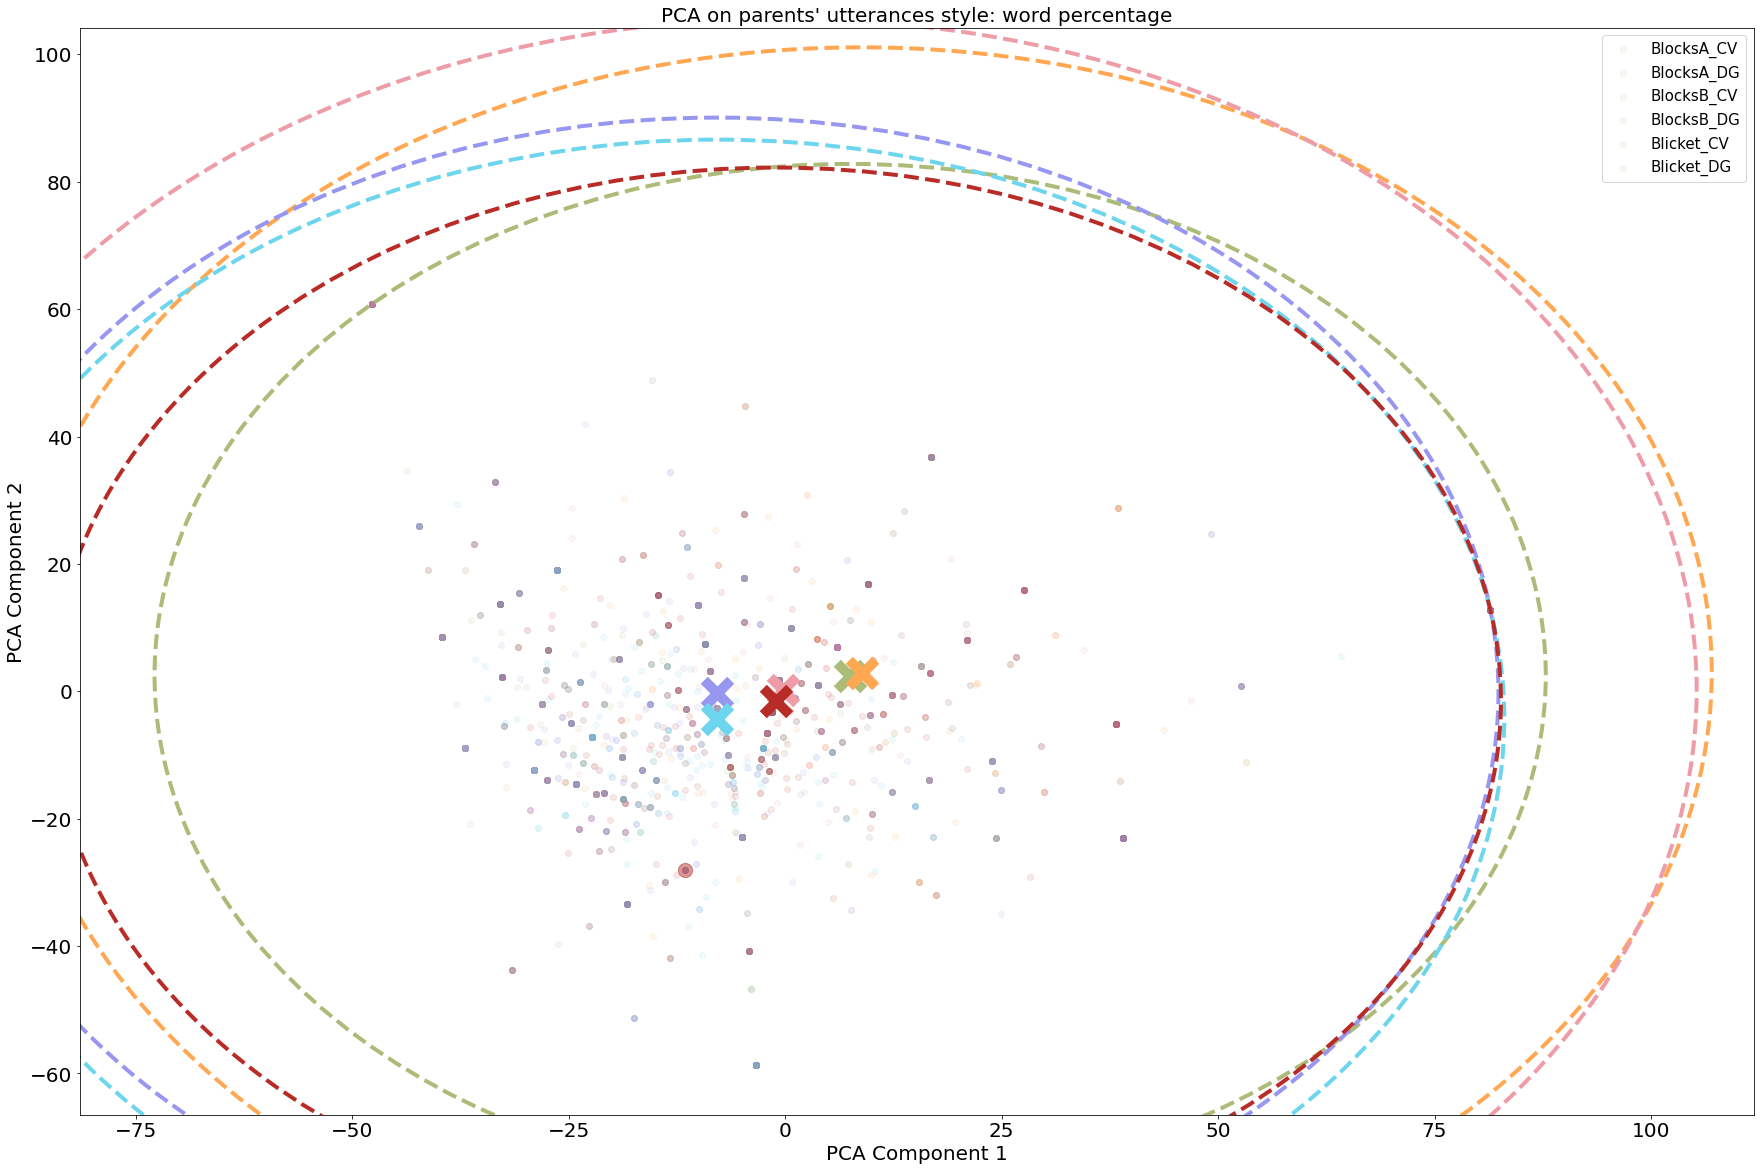

In [14]:
# plot the scatterplot and circles around centers
fig, ax = plt.subplots(figsize=(30, 20))

for i, vec in enumerate(reduced_vectors):
    x, y = vec[0], vec[1]
    task_type = df.iloc[i]["Task_name"]
    color = task_colors[task_type]
    ax.scatter(x, y, color=color, alpha=0.1)

# calculate and plot task centers and circles
df_by_task = df.groupby("Task_name")
centers = {}
for task, task_df in df_by_task:
    task_vectors = reduced_vectors[task_df.index]
    center = np.mean(task_vectors, axis=0)
    centers[task] = center
    circle = plt.Circle((center[0], center[1]), radius=np.max(np.linalg.norm(task_vectors-center, axis=1)), 
                        edgecolor=task_colors[task], linestyle='--', fill=False,  linewidth= 4)
    ax.scatter(*center, color=task_colors[task], marker='x', s=700, linewidth=10)
    ax.add_artist(circle)
    ax.scatter(x, y, color=color, alpha=0.1, s=200)

# add legend and axis labels
ax.legend(task_colors.keys(), loc='upper right', fontsize=15)
ax.set_xlabel("PCA Component 1", fontsize=20)
ax.set_ylabel("PCA Component 2", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.title("PCA on parents' utterances style: word percentage", fontsize=20)



# Calculate the DPI value based on the desired dimensions
dpi = 300  # Standard screen DPI



# Save the figure with the specified dimensions and DPI
plt.savefig("scatter_plot_PCA.svg", dpi=dpi)



In [13]:
plt.savefig("scatter_plot_PCA.svg", dpi=dpi, bbox_inches='tight', pad_inches=0)


<Figure size 432x288 with 0 Axes>

#### word percentage: results from the plot

- 'BlocksA_CV': purple, 
- 'BlocksA_DG': pink,
- 'BlocksB_CV': blue, 
- 'BlocksB_DG': red,
- 'Blicket_CV': light green, 
- 'Blicket_DG': orange

1. BlocksA_CV & BlocksB_CV are similiar
2. BlocksA_DG & BlocksB_DG are similiar
3. Blicket_CV & Blicket_DG are similiar

- task differences
    + Blicket task is generally different from BlocksA&B
- condition differences
    + no sig differences between blicket
    + but seems to affect BlocksA&B
- explanation
    + it is possible that the parents do not aware the change of A, B task in Blocks; therefore, only the condition change can be found
    + Blicket (learning) and Blocks (cooperation) task are different, so the POS formation is different across tasks
    